In [3]:
import numpy as np
import pandas as pd
import os
import csv

In [4]:
!pip install seaborn
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


You should consider upgrading via the 'pip install --upgrade pip' command.


In [5]:
train = pd.read_excel("Data_Train.xlsx")

In [6]:
test = pd.read_excel("Data_Test.xlsx")

In [7]:
train['Average_Cost'] = train['Average_Cost'].map(lambda x: x.lstrip('₹').rstrip(''))
train['Average_Cost'] = train['Average_Cost'].map(lambda x: x.replace(',', ''))
test['Average_Cost'] = test['Average_Cost'].map(lambda x: x.lstrip('₹').rstrip(''))
test['Average_Cost'] = test['Average_Cost'].map(lambda x:  x.replace(',', ''))
test['Minimum_Order'] = test['Minimum_Order'].map(lambda x: x.lstrip('₹').rstrip(''))
test['Minimum_Order'] = test['Minimum_Order'].map(lambda x:  x.replace(',', ''))
train['Minimum_Order'] = train['Minimum_Order'].map(lambda x: x.lstrip('₹').rstrip(''))
train['Minimum_Order'] = train['Minimum_Order'].map(lambda x:  x.replace(',', ''))

In [8]:
train

Restaurant                                          Location  \
0        ID_6321               FTI College, Law College Road, Pune   
1        ID_2882                              Sector 3, Marathalli   
2        ID_1595                                    Mumbai Central   
3        ID_5929                                   Sector 1, Noida   
4        ID_6123                Rmz Centennial, I Gate, Whitefield   
5        ID_5221                Rmz Centennial, I Gate, Whitefield   
6        ID_3777                                    Mumbai Central   
7         ID_745                        Delhi University-GTB Nagar   
8        ID_2970                        Delhi University-GTB Nagar   
9        ID_3474                                   Sector 1, Noida   
10       ID_5159                                    Mumbai Central   
11       ID_1696                       Yerawada, Pune, Maharashtra   
12       ID_1156                                   Sector 1, Noida   
13        ID_354                        Delhi University-GTB Nagar   
14       ID_6891              Delhi Administration Flats, Timarpur   
15       ID_6406                                  Moulali, Kolkata   
16       ID_2141                                   Sector 1, Noida   
17       ID_3355                    Dockyard Road, Mumbai CST Area   
18       ID_5262                                   Pune University   
19       ID_8148        Gora Bazar, Rajbari, North Dumdum, Kolkata   
20       ID_1681                         D-Block, Sector 63, Noida   
21       ID_3994                                  Sector 14, Noida   
22       ID_4012                         D-Block, Sector 63, Noida   
23        ID_240                         D-Block, Sector 63, Noida   
24       ID_4751                              Sector 3, Marathalli   
25       ID_4944        Mico Layout, Stage 2, BTM Layout,Bangalore   
26       ID_7029                         D-Block, Sector 63, Noida   
27       ID_6769                                    Mumbai Central   
28       ID_5547                    Dockyard Road, Mumbai CST Area   
29       ID_1957                                   Sector 1, Noida   
...          ...                                               ...   
11064    ID_7873                                      Delhi Cantt.   
11065    ID_5538                   Musi Nagar, Malakpet, Hyderabad   
11066    ID_7358                        Babarpur, New Delhi, Delhi   
11067    ID_3388                Chatta Bazaar, Malakpet, Hyderabad   
11068    ID_8063                        Delhi University-GTB Nagar   
11069    ID_2116              Delhi Administration Flats, Timarpur   
11070    ID_2261                                   Sector 1, Noida   
11071    ID_3344        Mico Layout, Stage 2, BTM Layout,Bangalore   
11072      ID_46                        Delhi University-GTB Nagar   
11073    ID_6038                 Nathan Road, Mangaldas Road, Pune   
11074    ID_5777                   Musi Nagar, Malakpet, Hyderabad   
11075    ID_8576        Mico Layout, Stage 2, BTM Layout,Bangalore   
11076    ID_1795                         D-Block, Sector 63, Noida   
11077    ID_4036                                  Sector 14, Noida   
11078    ID_6806                               Raja Bazar, Kolkata   
11079    ID_6720              Delhi Administration Flats, Timarpur   
11080     ID_646                                   Sector 1, Noida   
11081    ID_5239                        Delhi University-GTB Nagar   
11082    ID_1434  Laxman Vihar Industrial Area, Sector 3A, Gurgoan   
11083    ID_6048                 Nathan Road, Mangaldas Road, Pune   
11084     ID_968              Delhi Administration Flats, Timarpur   
11085    ID_2394                                          Majestic   
11086    ID_2050               FTI College, Law College Road, Pune   
11087    ID_1309                    Dockyard Road, Mumbai CST Area   
11088     ID_944                Rmz Centennial, I Gate, Whitefield   
11089    ID_8067

In [9]:
foods = set()
for i in range(0, len(train["Cuisines"])):
    l = train["Cuisines"][i].split(",")
    for x in l:
        foods.add(x)

In [10]:
foods

{' Afghan',
 ' American',
 ' Andhra',
 ' Arabian',
 ' Asian',
 ' Assamese',
 ' Awadhi',
 ' BBQ',
 ' Bakery',
 ' Bangladeshi',
 ' Bar Food',
 ' Belgian',
 ' Bengali',
 ' Beverages',
 ' Bihari',
 ' Biryani',
 ' Brazilian',
 ' Bubble Tea',
 ' Burger',
 ' Burmese',
 ' Cafe',
 ' Cantonese',
 ' Charcoal Chicken',
 ' Chettinad',
 ' Chinese',
 ' Coffee',
 ' Continental',
 ' Desserts',
 ' European',
 ' Fast Food',
 ' Finger Food',
 ' French',
 ' German',
 ' Goan',
 ' Greek',
 ' Gujarati',
 ' Healthy Food',
 ' Hot dogs',
 ' Hyderabadi',
 ' Ice Cream',
 ' Indian',
 ' Indonesian',
 ' Iranian',
 ' Israeli',
 ' Italian',
 ' Japanese',
 ' Juices',
 ' Kashmiri',
 ' Kebab',
 ' Kerala',
 ' Konkan',
 ' Korean',
 ' Lebanese',
 ' Lucknowi',
 ' Maharashtrian',
 ' Malaysian',
 ' Malwani',
 ' Mangalorean',
 ' Mediterranean',
 ' Mexican',
 ' Middle Eastern',
 ' Mishti',
 ' Mithai',
 ' Modern Indian',
 ' Momos',
 ' Mughlai',
 ' Naga',
 ' Nepalese',
 ' North Eastern',
 ' North Indian',
 ' Odia',
 ' Paan',
 ' Piz

In [11]:
len(foods)

180

In [12]:
place = set()
for i in range(0, len(train["Location"])):
    l = train["Location"][i].split(",")[-1]
    place.add(l)

In [13]:
avgCost = set()
minOrder = set()
rating = set()
votes = set()
rev = set()
time = set()
for i in range(0, len(train)):
    avgCost.add(train["Average_Cost"][i])
    minOrder.add(train["Minimum_Order"][i])
    rating.add(train["Rating"][i])
    votes.add(train["Votes"][i])
    rev.add(train["Reviews"][i])
    time.add(train["Delivery_Time"][i])


In [14]:
place = set()
for i in range(0, len(train["Location"])):
    l = train["Location"][i]
    place.add(l)

x=0
place_map = dict()
for i in place:
    place_map[i]= x
    x = x+1
place_map

{'BTM Layout 1, Electronic City': 24,
 'Babarpur, New Delhi, Delhi': 10,
 'Chandni Chowk, Kolkata': 20,
 'Chatta Bazaar, Malakpet, Hyderabad': 29,
 'D-Block, Sector 63, Noida': 30,
 'Delhi Administration Flats, Timarpur': 13,
 'Delhi Cantt.': 17,
 'Delhi High Court, India Gate': 27,
 'Delhi University-GTB Nagar': 25,
 'Dockyard Road, Mumbai CST Area': 12,
 'FTI College, Law College Road, Pune': 0,
 'Gora Bazar, Rajbari, North Dumdum, Kolkata': 31,
 'Hyderabad Public School, Begumpet': 8,
 'Jaya Nagar, Saidabad, Hyderabad': 5,
 'Laxman Vihar Industrial Area, Sector 3A, Gurgoan': 21,
 'MG Road, Pune': 26,
 'Majestic': 23,
 'Mico Layout, Stage 2, BTM Layout,Bangalore': 33,
 'Moulali, Kolkata': 22,
 'Mumbai Central': 1,
 'Musi Nagar, Malakpet, Hyderabad': 9,
 'Nathan Road, Mangaldas Road, Pune': 34,
 'Noorkhan Bazaar, Malakpet, Hyderabad': 4,
 'Panjetan Colony, Malakpet, Hyderabad': 6,
 'Pune University': 28,
 'Raja Bazar, Kolkata': 16,
 'Rmz Centennial, I Gate, Whitefield': 2,
 'Sandhurst

In [15]:
for i in range(0, len(train)):
    train['Location'][i] = place_map[train['Location'][i]] 

In [16]:
train

Restaurant Location                                           Cuisines  \
0        ID_6321        0             Fast Food, Rolls, Burger, Salad, Wraps   
1        ID_2882        3                                Ice Cream, Desserts   
2        ID_1595        1                    Italian, Street Food, Fast Food   
3        ID_5929       18                     Mughlai, North Indian, Chinese   
4        ID_6123        2                                    Cafe, Beverages   
5        ID_5221        2                South Indian, North Indian, Chinese   
6        ID_3777        1                               Beverages, Fast Food   
7         ID_745       25                               Chinese, Thai, Asian   
8        ID_2970       25                                Mithai, Street Food   
9        ID_3474       18  Fast Food, North Indian, Rolls, Chinese, Momos...   
10       ID_5159        1                     North Indian, Chinese, Mughlai   
11       ID_1696        7                 Chinese, Thai, Indonesian, Italian   
12       ID_1156       18             Burger, Fast Food, Desserts, Beverages   
13        ID_354       25                                          Beverages   
14       ID_6891       13                                          Fast Food   
15       ID_6406       22                                   Biryani, Mughlai   
16       ID_2141       18                                            Italian   
17       ID_3355       12     Chinese, North Indian, South Indian, Fast Food   
18       ID_5262       28                                     Kerala, Bihari   
19       ID_8148       31                                       South Indian   
20       ID_1681       30                Chinese, North Indian, Rolls, Momos   
21       ID_3994       19                                North Indian, Rolls   
22       ID_4012       30                              North Indian, Chinese   
23        ID_240       30                              Biryani, North Indian   
24       ID_4751        3                   North Indian, Chinese, Fast Food   
25       ID_4944       33                                Desserts, Ice Cream   
26       ID_7029       30                              North Indian, Chinese   
27       ID_6769        1               Fast Food, South Indian, Street Food   
28       ID_5547       12                                       North Indian   
29       ID_1957       18                              North Indian, Chinese   
...          ...      ...                                                ...   
11064    ID_7873       17                              North Indian, Mughlai   
11065    ID_5538        9                            North Indian, Beverages   
11066    ID_7358       10                              North Indian, Chinese   
11067    ID_3388       29                South Indian, North Indian, Chinese   
11068    ID_8063       25                                          Fast Food   
11069    ID_2116       13                              North Indian, Chinese   
11070    ID_2261       18                              North Indian, Chinese   
11071    ID_3344       33                              North Indian, Chinese   
11072      ID_46       25                                   Fast Food, Rolls   
11073    ID_6038       34              North Indian, Mughlai, Kebab, Chinese   
11074    ID_5777        9                                       South Indian   
11075    ID_8576       33                                  Beverages, Juices   
11076    ID_1795       30                              North Indian, Mughlai   
11077    ID_4036       19               Beverages, Tea, Coffee, North Indian   
11078    ID_6806       16                      Rajasthani, Fast Food, Mishti   
11079    ID_6720       13                                       North Indian   
11080     ID_646       18              Chinese, Seafood, Asian, North Indian   
11081    ID_5239       25                                Fast Food, Desserts   
11082 

In [17]:
for i in range(0, len(train)):
    train['Delivery_Time'][i] = (train['Delivery_Time'][i]).split()[0]

In [18]:
train

Restaurant Location                                           Cuisines  \
0        ID_6321        0             Fast Food, Rolls, Burger, Salad, Wraps   
1        ID_2882        3                                Ice Cream, Desserts   
2        ID_1595        1                    Italian, Street Food, Fast Food   
3        ID_5929       18                     Mughlai, North Indian, Chinese   
4        ID_6123        2                                    Cafe, Beverages   
5        ID_5221        2                South Indian, North Indian, Chinese   
6        ID_3777        1                               Beverages, Fast Food   
7         ID_745       25                               Chinese, Thai, Asian   
8        ID_2970       25                                Mithai, Street Food   
9        ID_3474       18  Fast Food, North Indian, Rolls, Chinese, Momos...   
10       ID_5159        1                     North Indian, Chinese, Mughlai   
11       ID_1696        7                 Chinese, Thai, Indonesian, Italian   
12       ID_1156       18             Burger, Fast Food, Desserts, Beverages   
13        ID_354       25                                          Beverages   
14       ID_6891       13                                          Fast Food   
15       ID_6406       22                                   Biryani, Mughlai   
16       ID_2141       18                                            Italian   
17       ID_3355       12     Chinese, North Indian, South Indian, Fast Food   
18       ID_5262       28                                     Kerala, Bihari   
19       ID_8148       31                                       South Indian   
20       ID_1681       30                Chinese, North Indian, Rolls, Momos   
21       ID_3994       19                                North Indian, Rolls   
22       ID_4012       30                              North Indian, Chinese   
23        ID_240       30                              Biryani, North Indian   
24       ID_4751        3                   North Indian, Chinese, Fast Food   
25       ID_4944       33                                Desserts, Ice Cream   
26       ID_7029       30                              North Indian, Chinese   
27       ID_6769        1               Fast Food, South Indian, Street Food   
28       ID_5547       12                                       North Indian   
29       ID_1957       18                              North Indian, Chinese   
...          ...      ...                                                ...   
11064    ID_7873       17                              North Indian, Mughlai   
11065    ID_5538        9                            North Indian, Beverages   
11066    ID_7358       10                              North Indian, Chinese   
11067    ID_3388       29                South Indian, North Indian, Chinese   
11068    ID_8063       25                                          Fast Food   
11069    ID_2116       13                              North Indian, Chinese   
11070    ID_2261       18                              North Indian, Chinese   
11071    ID_3344       33                              North Indian, Chinese   
11072      ID_46       25                                   Fast Food, Rolls   
11073    ID_6038       34              North Indian, Mughlai, Kebab, Chinese   
11074    ID_5777        9                                       South Indian   
11075    ID_8576       33                                  Beverages, Juices   
11076    ID_1795       30                              North Indian, Mughlai   
11077    ID_4036       19               Beverages, Tea, Coffee, North Indian   
11078    ID_6806       16                      Rajasthani, Fast Food, Mishti   
11079    ID_6720       13                                       North Indian   
11080     ID_646       18              Chinese, Seafood, Asian, North Indian   
11081    ID_5239       25                                Fast Food, Desserts   
11082 

In [19]:
foods = list(foods)
for i in range(0, len(foods)):
    foods[i] = foods[i].strip()

In [20]:
foods = set(foods)

In [21]:
len(foods)

101

In [22]:
foods = list(foods)

In [23]:
foods

['Middle Eastern',
 'Greek',
 'Street Food',
 'Healthy Food',
 'Roast Chicken',
 'Salad',
 'Poké',
 'Portuguese',
 'Coffee',
 'Spanish',
 'Sushi',
 'Tamil',
 'Tex-Mex',
 'African',
 'European',
 'Turkish',
 'Asian',
 'German',
 'Parsi',
 'BBQ',
 'Paan',
 'North Eastern',
 'Andhra',
 'Juices',
 'Pizza',
 'Charcoal Chicken',
 'Lebanese',
 'Mithai',
 'Steak',
 'Momos',
 'Chettinad',
 'Israeli',
 'Seafood',
 'North Indian',
 'Indonesian',
 'Burmese',
 'Afghan',
 'Hyderabadi',
 'Bengali',
 'Assamese',
 'Malaysian',
 'Malwani',
 'French',
 'Awadhi',
 'Bubble Tea',
 'Ice Cream',
 'Desserts',
 'Raw Meats',
 'Mangalorean',
 'Bihari',
 'Burger',
 'Modern Indian',
 'Italian',
 'Finger Food',
 'Hot dogs',
 'Odia',
 'Mughlai',
 'Sri Lankan',
 'Continental',
 'Nepalese',
 'Rajasthani',
 'Vietnamese',
 'Cantonese',
 'Bangladeshi',
 'Gujarati',
 'Bakery',
 'Brazilian',
 'Belgian',
 'Chinese',
 'Mishti',
 'Cafe',
 'Thai',
 'Bohri',
 'Naga',
 'Fast Food',
 'Arabian',
 'Sandwich',
 'South Indian',
 'Konk

In [24]:
D = train.drop(["Cuisines"], axis = 1)

In [25]:
D

Restaurant Location Average_Cost Minimum_Order Rating Votes Reviews  \
0        ID_6321        0          200            50    3.5    12       4   
1        ID_2882        3          100            50    3.5    11       4   
2        ID_1595        1          150            50    3.6    99      30   
3        ID_5929       18          250            99    3.7   176      95   
4        ID_6123        2          200            99    3.2   521     235   
5        ID_5221        2          150            50    3.8    46      18   
6        ID_3777        1          150            50    3.7   108      31   
7         ID_745       25          650            50    4.0  1731    1235   
8        ID_2970       25          100            50    3.9   110      26   
9        ID_3474       18          200            50    3.9   562     294   
10       ID_5159        1          350            50    3.8   186      61   
11       ID_1696        7          800            50    4.2  1693    1239   
12       ID_1156       18          150            50      -     -       -   
13        ID_354       25           50             0    3.8   184     128   
14       ID_6891       13          100            50    3.5    23       5   
15       ID_6406       22          100            50    3.6   353      53   
16       ID_2141       18          100            50      -     -       -   
17       ID_3355       12          200            50    3.7   139      47   
18       ID_5262       28          150            50      -     -       -   
19       ID_8148       31          100            50    3.7   159      46   
20       ID_1681       30          200            99    2.8    67      23   
21       ID_3994       19          150            50    3.9   387     160   
22       ID_4012       30          250            50    3.0     5       2   
23        ID_240       30          200            99    3.7   138      26   
24       ID_4751        3          150            50    3.2     4       1   
25       ID_4944       33          100            50      -     -       -   
26       ID_7029       30          100            99    3.7   110      38   
27       ID_6769        1          150            50    3.2    15       9   
28       ID_5547       12          150            50    3.3    44      19   
29       ID_1957       18          200            50    3.8    18      18   
...          ...      ...          ...           ...    ...   ...     ...   
11064    ID_7873       17          200            50    4.5  1297     549   
11065    ID_5538        9          100            50    2.8     4       3   
11066    ID_7358       10          100            50    2.7     4       1   
11067    ID_3388       29          350            50    3.4    18       4   
11068    ID_8063       25          100            50    2.8     8       3   
11069    ID_2116       13          300            50    3.4    13       4   
11070    ID_2261       18          200             0    3.7   260      77   
11071    ID_3344       33          200            50    3.6    24       3   
11072      ID_46       25          100            50    3.8    80      38   
11073    ID_6038       34          300            50    3.8   689     341   
11074    ID_5777        9          100            50    3.0     6       1   
11075    ID_8576       33          100            50    3.2     6       4   
11076    ID_1795       30          350            50    3.4   132      47   
11077    ID_4036       19          100            50    3.2     7       3   
11078    ID_6806       16          100            50    3.4   163      24   
11079    ID_6720       13          100            50    3.6    57      12   
11080     ID_646       18          650            50    4.0   715     422   
11081    ID_5239       25          150            50    3.6    38      21   
11082    ID_1434       21          200            50      -     -       -   
11083    ID_6048       34          400            50    4.3  1741     736   
11

In [26]:
aC = 0
mO = 0
ra = 0
v = 0
re = 0
tot = 0
for i in range(0, len(D)):
    try:
        aC += float(D["Average_Cost"][i])
    except:
        pass
    try:
        mO += float(D["Minimum_Order"][i])
    except:
        pass
    try:
        ra += float(D["Rating"][i])
    except:
        pass
    try:
        v += float(D["Votes"][i])
    except:
        pass
    try:
        re += float(D["Reviews"][i])
    except:
        pass
    tot += 1


print("Averages")
print("Average_Cost:", aC/tot)
print("Min_Order", mO/tot)
print("Rat", ra/tot)
print("Vo", v/tot)
print("Re", re/tot)

Averages
Average_Cost: 202.69064359113034
Min_Order 53.34451054624121
Rat 2.974085091040189
Vo 198.8273841716243
Re 97.5629168920137


In [27]:
for i in range(0, len(D)):
    if D["Average_Cost"][i] == 'for':
        D["Average_Cost"][i] = str(203.0)
    if D["Rating"][i] == 'NEW':
        D["Rating"][i] = str(4.0)
    if D["Rating"][i] == '-':
        D["Rating"][i] = str(3.0)
    if D["Rating"][i] == 'Opening Soon':
        D["Rating"][i] = str(4.0)
    if D["Rating"][i] == 'Temporarily Closed':
        D["Rating"][i] = str(2.9)
    if D["Votes"][i] == '-':
        D["Votes"][i] = str(199.0)
    if D["Reviews"][i] == '-':
        D["Reviews"][i] = str(97.5)

In [28]:
lol = [[0]*len(foods)]*11094
df = pd.DataFrame(lol, columns = foods, dtype=float)

In [29]:
for i in range(0, len(train)):
    l = train["Cuisines"][i].split(",")
    for cu in l:
        print(cu)
        cu = cu.strip()
        df[str(cu)][i] = 1.0
        

Fast Food
 Rolls
 Burger
 Salad
 Wraps
Ice Cream
 Desserts
Italian
 Street Food
 Fast Food
Mughlai
 North Indian
 Chinese
Cafe
 Beverages
South Indian
 North Indian
 Chinese
Beverages
 Fast Food
Chinese
 Thai
 Asian
Mithai
 Street Food
Fast Food
 North Indian
 Rolls
 Chinese
 Momos
 Mughlai
North Indian
 Chinese
 Mughlai
Chinese
 Thai
 Indonesian
 Italian
Burger
 Fast Food
 Desserts
 Beverages
Beverages
Fast Food
Biryani
 Mughlai
Italian
Chinese
 North Indian
 South Indian
 Fast Food
Kerala
 Bihari
South Indian
Chinese
 North Indian
 Rolls
 Momos
North Indian
 Rolls
North Indian
 Chinese
Biryani
 North Indian
North Indian
 Chinese
 Fast Food
Desserts
 Ice Cream
North Indian
 Chinese
Fast Food
 South Indian
 Street Food
North Indian
North Indian
 Chinese
North Indian
Cafe
 Mexican
 Japanese
 Italian
 Chinese
Bakery
 Fast Food
 Rolls
 Beverages
North Indian
 Chinese
North Indian
Asian
 Burmese
 Bubble Tea
 Desserts
 Salad
 Tea
 Beverages
 Ice Cream
Street Food
Fast Food
 South Indian
Piz

In [30]:
df

Middle Eastern  Greek  Street Food  Healthy Food  Roast Chicken  Salad  \
0                 0.0    0.0          0.0           0.0            0.0    1.0   
1                 0.0    0.0          0.0           0.0            0.0    0.0   
2                 0.0    0.0          1.0           0.0            0.0    0.0   
3                 0.0    0.0          0.0           0.0            0.0    0.0   
4                 0.0    0.0          0.0           0.0            0.0    0.0   
5                 0.0    0.0          0.0           0.0            0.0    0.0   
6                 0.0    0.0          0.0           0.0            0.0    0.0   
7                 0.0    0.0          0.0           0.0            0.0    0.0   
8                 0.0    0.0          1.0           0.0            0.0    0.0   
9                 0.0    0.0          0.0           0.0            0.0    0.0   
10                0.0    0.0          0.0           0.0            0.0    0.0   
11                0.0    0.0          0.0           0.0            0.0    0.0   
12                0.0    0.0          0.0           0.0            0.0    0.0   
13                0.0    0.0          0.0           0.0            0.0    0.0   
14                0.0    0.0          0.0           0.0            0.0    0.0   
15                0.0    0.0          0.0           0.0            0.0    0.0   
16                0.0    0.0          0.0           0.0            0.0    0.0   
17                0.0    0.0          0.0           0.0            0.0    0.0   
18                0.0    0.0          0.0           0.0            0.0    0.0   
19                0.0    0.0          0.0           0.0            0.0    0.0   
20                0.0    0.0          0.0           0.0            0.0    0.0   
21                0.0    0.0          0.0           0.0            0.0    0.0   
22                0.0    0.0          0.0           0.0            0.0    0.0   
23                0.0    0.0          0.0           0.0            0.0    0.0   
24                0.0    0.0          0.0           0.0            0.0    0.0   
25                0.0    0.0          0.0           0.0            0.0    0.0   
26                0.0    0.0          0.0           0.0            0.0    0.0   
27                0.0    0.0          1.0           0.0            0.0    0.0   
28                0.0    0.0          0.0           0.0            0.0    0.0   
29                0.0    0.0          0.0           0.0            0.0    0.0   
...               ...    ...          ...           ...            ...    ...   
11064             0.0    0.0          0.0           0.0            0.0    0.0   
11065             0.0    0.0          0.0           0.0            0.0    0.0   
11066             0.0    0.0          0.0           0.0            0.0    0.0   
11067             0.0    0.0          0.0           0.0            0.0    0.0   
11068             0.0    0.0          0.0           0.0            0.0    0.0   
11069             0.0    0.0          0.0           0.0            0.0    0.0   
11070             0.0    0.0          0.0           0.0            0.0    0.0   
11071             0.0    0.0          0.0           0.0            0.0    0.0   
11072             0.0    0.0          0.0           0.0            0.0    0.0   
11073             0.0    0.0          0.0           0.0            0.0    0.0   
11074             0.0    0.0          0.0           0.0            0.0    0.0   
11075             0.0    0.0          0.0           0.0            0.0    0.0   
11076             0.0    0.0          0.0           0.0            0.0    0.0   
11077             0.0    0.0          0.0           0.0            0.0    0.0   
11078             0.0    0.0          0.0           0.0            0.0    0.0   
11079             0.0    0.0          0.0           0.0            0.0    0.0   
11080             0.0    0.0          0.0           0.0            0.0    0.0   
11081             0.0    0.0          

In [31]:
convert_dict = {'Location': float, 'Average_Cost': float, 'Minimum_Order': float, 'Rating': float, 'Votes': float, 'Reviews': float, 'Delivery_Time': float }

In [32]:
D = D.astype(convert_dict) 
print(D.dtypes)

Restaurant        object
Location         float64
Average_Cost     float64
Minimum_Order    float64
Rating           float64
Votes            float64
Reviews          float64
Delivery_Time    float64
dtype: object


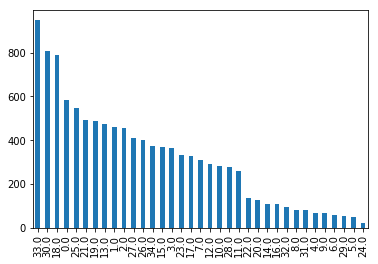

In [33]:
D['Location'].value_counts().plot(kind='bar');


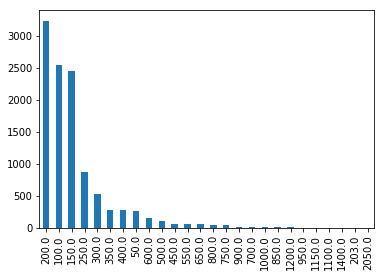

In [34]:
D['Average_Cost'].value_counts().plot(kind='bar');

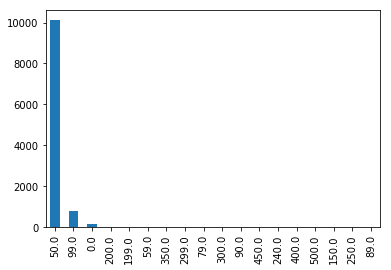

In [35]:
D['Minimum_Order'].value_counts().plot(kind='bar');

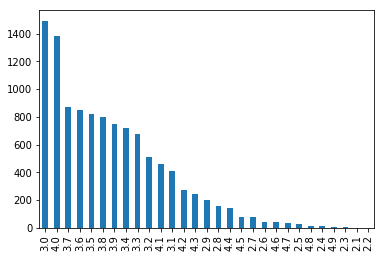

In [36]:
D['Rating'].value_counts().plot(kind='bar');

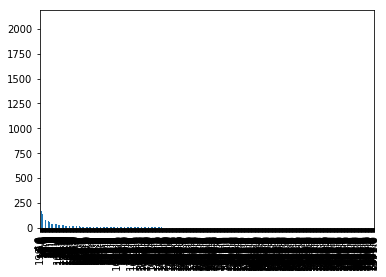

In [37]:
D['Votes'].value_counts().plot(kind='bar');

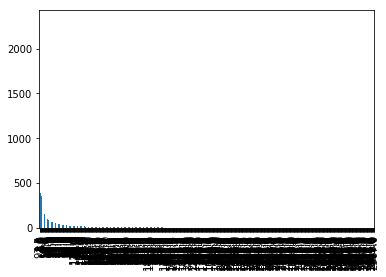

In [38]:
D['Reviews'].value_counts().plot(kind='bar');

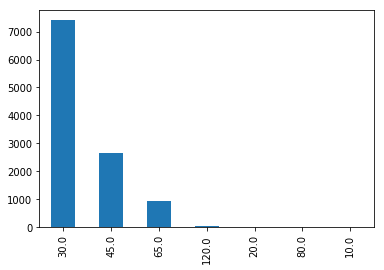

In [39]:
D['Delivery_Time'].value_counts().plot(kind='bar');

In [40]:
D["Reviews"].unique().tolist()

[4.0,
 30.0,
 95.0,
 235.0,
 18.0,
 31.0,
 1235.0,
 26.0,
 294.0,
 61.0,
 1239.0,
 97.5,
 128.0,
 5.0,
 53.0,
 47.0,
 46.0,
 23.0,
 160.0,
 2.0,
 1.0,
 38.0,
 9.0,
 19.0,
 7.0,
 132.0,
 74.0,
 13.0,
 111.0,
 499.0,
 29.0,
 34.0,
 851.0,
 513.0,
 22.0,
 27.0,
 32.0,
 25.0,
 37.0,
 8.0,
 35.0,
 6.0,
 173.0,
 36.0,
 15.0,
 174.0,
 11.0,
 59.0,
 16.0,
 89.0,
 170.0,
 10.0,
 1660.0,
 71.0,
 41.0,
 20.0,
 40.0,
 3.0,
 191.0,
 105.0,
 100.0,
 106.0,
 21.0,
 65.0,
 69.0,
 2547.0,
 159.0,
 110.0,
 42.0,
 181.0,
 109.0,
 179.0,
 490.0,
 28.0,
 343.0,
 118.0,
 690.0,
 72.0,
 296.0,
 33.0,
 164.0,
 50.0,
 129.0,
 1581.0,
 234.0,
 45.0,
 2363.0,
 24.0,
 115.0,
 12.0,
 138.0,
 175.0,
 39.0,
 66.0,
 1603.0,
 1443.0,
 390.0,
 108.0,
 1457.0,
 112.0,
 107.0,
 259.0,
 269.0,
 52.0,
 196.0,
 794.0,
 589.0,
 48.0,
 145.0,
 536.0,
 247.0,
 17.0,
 49.0,
 245.0,
 87.0,
 83.0,
 54.0,
 453.0,
 318.0,
 99.0,
 205.0,
 165.0,
 1845.0,
 766.0,
 114.0,
 44.0,
 51.0,
 104.0,
 478.0,
 70.0,
 232.0,
 435.0,
 14.0,
 65

In [41]:
cols = df.columns

In [42]:
cols

Index(['Middle Eastern', 'Greek', 'Street Food', 'Healthy Food',
       'Roast Chicken', 'Salad', 'Poké', 'Portuguese', 'Coffee', 'Spanish',
       ...
       'Tea', 'Goan', 'Lucknowi', 'American', 'Wraps', 'Beverages', 'Rolls',
       'Kashmiri', 'Bar Food', 'Japanese'],
      dtype='object', length=101)

In [43]:
for i in cols:
    D[i] = df[i]

In [44]:
D

Restaurant  Location  Average_Cost  Minimum_Order  Rating   Votes  \
0        ID_6321       0.0         200.0           50.0     3.5    12.0   
1        ID_2882       3.0         100.0           50.0     3.5    11.0   
2        ID_1595       1.0         150.0           50.0     3.6    99.0   
3        ID_5929      18.0         250.0           99.0     3.7   176.0   
4        ID_6123       2.0         200.0           99.0     3.2   521.0   
5        ID_5221       2.0         150.0           50.0     3.8    46.0   
6        ID_3777       1.0         150.0           50.0     3.7   108.0   
7         ID_745      25.0         650.0           50.0     4.0  1731.0   
8        ID_2970      25.0         100.0           50.0     3.9   110.0   
9        ID_3474      18.0         200.0           50.0     3.9   562.0   
10       ID_5159       1.0         350.0           50.0     3.8   186.0   
11       ID_1696       7.0         800.0           50.0     4.2  1693.0   
12       ID_1156      18.0         150.0           50.0     3.0   199.0   
13        ID_354      25.0          50.0            0.0     3.8   184.0   
14       ID_6891      13.0         100.0           50.0     3.5    23.0   
15       ID_6406      22.0         100.0           50.0     3.6   353.0   
16       ID_2141      18.0         100.0           50.0     3.0   199.0   
17       ID_3355      12.0         200.0           50.0     3.7   139.0   
18       ID_5262      28.0         150.0           50.0     3.0   199.0   
19       ID_8148      31.0         100.0           50.0     3.7   159.0   
20       ID_1681      30.0         200.0           99.0     2.8    67.0   
21       ID_3994      19.0         150.0           50.0     3.9   387.0   
22       ID_4012      30.0         250.0           50.0     3.0     5.0   
23        ID_240      30.0         200.0           99.0     3.7   138.0   
24       ID_4751       3.0         150.0           50.0     3.2     4.0   
25       ID_4944      33.0         100.0           50.0     3.0   199.0   
26       ID_7029      30.0         100.0           99.0     3.7   110.0   
27       ID_6769       1.0         150.0           50.0     3.2    15.0   
28       ID_5547      12.0         150.0           50.0     3.3    44.0   
29       ID_1957      18.0         200.0           50.0     3.8    18.0   
...          ...       ...           ...            ...     ...     ...   
11064    ID_7873      17.0         200.0           50.0     4.5  1297.0   
11065    ID_5538       9.0         100.0           50.0     2.8     4.0   
11066    ID_7358      10.0         100.0           50.0     2.7     4.0   
11067    ID_3388      29.0         350.0           50.0     3.4    18.0   
11068    ID_8063      25.0         100.0           50.0     2.8     8.0   
11069    ID_2116      13.0         300.0           50.0     3.4    13.0   
11070    ID_2261      18.0         200.0            0.0     3.7   260.0   
11071    ID_3344      33.0         200.0           50.0     3.6    24.0   
11072      ID_46      25.0         100.0           50.0     3.8    80.0   
11073    ID_6038      34.0         300.0           50.0     3.8   689.0   
11074    ID_5777       9.0         100.0           50.0     3.0     6.0   
11075    ID_8576      33.0         100.0           50.0     3.2     6.0   
11076    ID_1795      30.0         350.0           50.0     3.4   132.0   
11077    ID_4036      19.0         100.0           50.0     3.2     7.0   
11078    ID_6806      16.0         100.0           50.0     3.4   163.0   
11079    ID_6720      13.0         100.0           50.0     3.6    57.0   
11080     ID_646      18.0         650.0           50.0     4.0   715.0   
11081    ID_5239      25.0         150.0           50.0     3.6    38.0   
11082    ID_1434      21.0         200.0           50.0     3.0   199.0   
11083    ID_6048      34.0         400.0           50.0     4.3  1741.0   
11084     ID_968      13.0         200.0           50.0     4.0   199.0   
11085    ID_2394      23.0     

In [45]:
Y = D["Delivery_Time"]
X = D.drop(["Delivery_Time"], axis = 1)

In [46]:
X.shape

(11094, 108)

In [47]:
Y.shape

(11094,)

In [48]:
Y.value_counts()

30.0     7406
45.0     2665
65.0      923
120.0      62
20.0       20
80.0       14
10.0        4
Name: Delivery_Time, dtype: int64

In [49]:
D["Restaurant"].value_counts()

ID_7184    22
ID_7295    20
ID_4625    20
ID_5321    19
ID_5538    19
ID_2483    18
ID_2301    17
ID_4654    16
ID_1140    16
ID_7544    16
ID_1209    15
ID_8511    15
ID_188     15
ID_3970    14
ID_7750    14
ID_5708    14
ID_5952    13
ID_3969    13
ID_7564    13
ID_7260    12
ID_720     12
ID_2794    12
ID_4906    12
ID_4446    11
ID_4652    11
ID_2542    11
ID_5885    11
ID_686     11
ID_6229    11
ID_1635    10
           ..
ID_2507     1
ID_7373     1
ID_616      1
ID_7781     1
ID_6186     1
ID_7562     1
ID_2389     1
ID_1541     1
ID_856      1
ID_7669     1
ID_6517     1
ID_7316     1
ID_6876     1
ID_1926     1
ID_1352     1
ID_4751     1
ID_4826     1
ID_7080     1
ID_7163     1
ID_2620     1
ID_3870     1
ID_2265     1
ID_7590     1
ID_1000     1
ID_1802     1
ID_4320     1
ID_7153     1
ID_5491     1
ID_2966     1
ID_8349     1
Name: Restaurant, Length: 7480, dtype: int64

In [50]:
X = X.drop(["Restaurant"], axis = 1)

In [51]:
X

Location  Average_Cost  Minimum_Order  Rating   Votes  Reviews  \
0           0.0         200.0           50.0     3.5    12.0      4.0   
1           3.0         100.0           50.0     3.5    11.0      4.0   
2           1.0         150.0           50.0     3.6    99.0     30.0   
3          18.0         250.0           99.0     3.7   176.0     95.0   
4           2.0         200.0           99.0     3.2   521.0    235.0   
5           2.0         150.0           50.0     3.8    46.0     18.0   
6           1.0         150.0           50.0     3.7   108.0     31.0   
7          25.0         650.0           50.0     4.0  1731.0   1235.0   
8          25.0         100.0           50.0     3.9   110.0     26.0   
9          18.0         200.0           50.0     3.9   562.0    294.0   
10          1.0         350.0           50.0     3.8   186.0     61.0   
11          7.0         800.0           50.0     4.2  1693.0   1239.0   
12         18.0         150.0           50.0     3.0   199.0     97.5   
13         25.0          50.0            0.0     3.8   184.0    128.0   
14         13.0         100.0           50.0     3.5    23.0      5.0   
15         22.0         100.0           50.0     3.6   353.0     53.0   
16         18.0         100.0           50.0     3.0   199.0     97.5   
17         12.0         200.0           50.0     3.7   139.0     47.0   
18         28.0         150.0           50.0     3.0   199.0     97.5   
19         31.0         100.0           50.0     3.7   159.0     46.0   
20         30.0         200.0           99.0     2.8    67.0     23.0   
21         19.0         150.0           50.0     3.9   387.0    160.0   
22         30.0         250.0           50.0     3.0     5.0      2.0   
23         30.0         200.0           99.0     3.7   138.0     26.0   
24          3.0         150.0           50.0     3.2     4.0      1.0   
25         33.0         100.0           50.0     3.0   199.0     97.5   
26         30.0         100.0           99.0     3.7   110.0     38.0   
27          1.0         150.0           50.0     3.2    15.0      9.0   
28         12.0         150.0           50.0     3.3    44.0     19.0   
29         18.0         200.0           50.0     3.8    18.0     18.0   
...         ...           ...            ...     ...     ...      ...   
11064      17.0         200.0           50.0     4.5  1297.0    549.0   
11065       9.0         100.0           50.0     2.8     4.0      3.0   
11066      10.0         100.0           50.0     2.7     4.0      1.0   
11067      29.0         350.0           50.0     3.4    18.0      4.0   
11068      25.0         100.0           50.0     2.8     8.0      3.0   
11069      13.0         300.0           50.0     3.4    13.0      4.0   
11070      18.0         200.0            0.0     3.7   260.0     77.0   
11071      33.0         200.0           50.0     3.6    24.0      3.0   
11072      25.0         100.0           50.0     3.8    80.0     38.0   
11073      34.0         300.0           50.0     3.8   689.0    341.0   
11074       9.0         100.0           50.0     3.0     6.0      1.0   
11075      33.0         100.0           50.0     3.2     6.0      4.0   
11076      30.0         350.0           50.0     3.4   132.0     47.0   
11077      19.0         100.0           50.0     3.2     7.0      3.0   
11078      16.0         100.0           50.0     3.4   163.0     24.0   
11079      13.0         100.0           50.0     3.6    57.0     12.0   
11080      18.0         650.0           50.0     4.0   715.0    422.0   
11081      25.0         150.0           50.0     3.6    38.0     21.0   
11082      21.0         200.0           50.0     3.0   199.0     97.5   
11083      34.0         400.0           50.0     4.3  1741.0    736.0   
11084      13.0         200.0           50.0     4.0   199.0     97.5   
11085      23.0         100.0           50.0     3.0   199.0     97.5   
11086       0.0         300.0           50.0     3.0   199.0     

In [52]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
labelEncoder = LabelEncoder()
labelEncoder.fit(Y)
Y = labelEncoder.transform(Y)

In [53]:
mapping = dict(zip(labelEncoder.classes_, labelEncoder.transform(labelEncoder.classes_)))

In [54]:
mapping

{10.0: 0, 20.0: 1, 30.0: 2, 45.0: 3, 65.0: 4, 80.0: 5, 120.0: 6}

In [55]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.20, random_state=42)

In [56]:
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(8875, 107) (2219, 107)
(8875,) (2219,)


In [57]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='rbf')
svclassifier.fit(X_train, y_train)

/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

In [58]:
y_pred = svclassifier.predict(X_test)

In [59]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0    1    0    0    0]
 [   0    0    1    0    0    0]
 [   0    0 1323  185    4    0]
 [   0    0  210  293   10    0]
 [   0    0   76   80   26    0]
 [   0    0    5    3    0    2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.82      0.88      0.85      1512
           3       0.52      0.57      0.55       513
           4       0.65      0.14      0.23       182
           6       1.00      0.20      0.33        10

    accuracy                           0.74      2219
   macro avg       0.50      0.30      0.33      2219
weighted avg       0.74      0.74      0.72      2219



/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [60]:
from sklearn.naive_bayes import MultinomialNB

In [61]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [63]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[  0   0   0   1   0   0   0]
 [  0   0   1   0   0   0   0]
 [  7 785 356 251  24  51  38]
 [  1 161 135  78  48  73  17]
 [  0  60  43  27  14  25  13]
 [  0   0   0   0   0   0   0]
 [  0   4   1   1   2   1   1]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.66      0.24      0.35      1512
           3       0.22      0.15      0.18       513
           4       0.16      0.08      0.10       182
           5       0.00      0.00      0.00         0
           6       0.01      0.10      0.03        10

    accuracy                           0.20      2219
   macro avg       0.15      0.08      0.09      2219
weighted avg       0.52      0.20      0.29      2219



/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [64]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier(random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0    1    0    0    0    0]
 [   0    1    0    0    0    0    0]
 [   0    4 1230  212   57    4    5]
 [   0    1  179  266   64    0    3]
 [   0    0   55   57   67    0    3]
 [   0    0    0    0    0    0    0]
 [   0    0    4    1    2    0    3]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.17      1.00      0.29         1
           2       0.84      0.81      0.83      1512
           3       0.50      0.52      0.51       513
           4       0.35      0.37      0.36       182
           5       0.00      0.00      0.00         0
           6       0.21      0.30      0.25        10

    accuracy                           0.71      2219
   macro avg       0.30      0.43      0.32      2219
weighted avg       0.72      0.71      0.71      2219



/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [67]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=256, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0    1    0    0    0]
 [   0    1    0    0    0    0]
 [   0    0 1411   93    7    1]
 [   0    0  203  294   16    0]
 [   0    0   68   58   55    1]
 [   0    0    5    1    2    2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       1.00      1.00      1.00         1
           2       0.84      0.93      0.88      1512
           3       0.66      0.57      0.61       513
           4       0.69      0.30      0.42       182
           6       0.50      0.20      0.29        10

    accuracy                           0.79      2219
   macro avg       0.61      0.50      0.53      2219
weighted avg       0.78      0.79      0.78      2219



/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [68]:
from sklearn.ensemble import AdaBoostClassifier
clf = AdaBoostClassifier(n_estimators=256, random_state=0)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0    1    0    0    0    0]
 [   0    0    1    0    0    0    0]
 [   0    0 1356  142    0   14    0]
 [   0    0  278  218    0   17    0]
 [   0    0   99   76    0    7    0]
 [   0    0    0    0    0    0    0]
 [   0    0    7    1    0    2    0]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.78      0.90      0.83      1512
           3       0.50      0.42      0.46       513
           4       0.00      0.00      0.00       182
           5       0.00      0.00      0.00         0
           6       0.00      0.00      0.00        10

    accuracy                           0.71      2219
   macro avg       0.18      0.19      0.18      2219
weighted avg       0.65      0.71      0.67      2219



/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


In [69]:
from sklearn.neural_network import MLPClassifier
clf =  MLPClassifier()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[   0    0    1    0    0    0    0]
 [   0    0    1    0    0    0    0]
 [   0    0 1378  131    2    1    0]
 [   0    0  292  210   11    0    0]
 [   0    0   95   77   10    0    0]
 [   0    0    0    0    0    0    0]
 [   0    0    6    2    0    0    2]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.00      0.00      0.00         1
           2       0.78      0.91      0.84      1512
           3       0.50      0.41      0.45       513
           4       0.43      0.05      0.10       182
           5       0.00      0.00      0.00         0
           6       1.00      0.20      0.33        10

    accuracy                           0.72      2219
   macro avg       0.39      0.23      0.25      2219
weighted avg       0.69      0.72      0.69      2219



/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
/home/vinay/Speedy/env/lib/python3.5/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
